## Part 1: Matplotlib

1. Create a line plot comparing total population over time:
   - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries

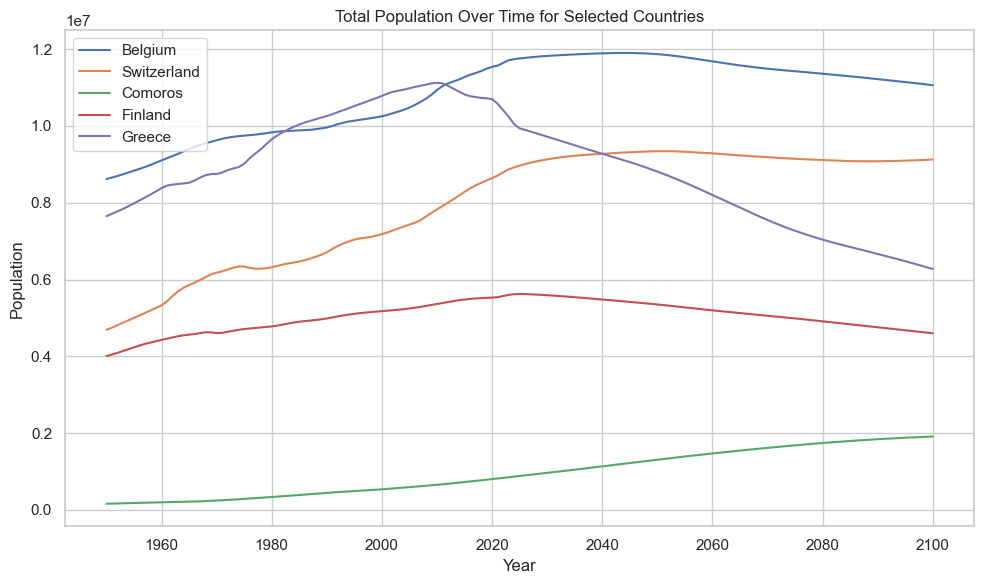

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create associated names for pulling data, legend, and graphs
countries = ['bel', 'che', 'com', 'fin', 'grc'] # chosen country codes
country_names = {
    'bel': 'Belgium',
    'che': 'Switzerland',
    'com': 'Comoros',
    'fin': 'Finland',
    'grc': 'Greece'
}

data = {}

for country in countries:
    # read csv file using the country code
    try:
        data[country] = pd.read_csv(f"ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv")
    # if error, return message
    except FileNotFoundError:
        print(f"Error: File for {country} not found.")
    except Exception as e:
        print(f"Error loading data for {country}: {e}")

pop_by_year = {}

for country, df in data.items():
    # find population counts by year
    if 'year' in df.columns and 'population' in df.columns:
        pop_by_year[country] = df.groupby('year')['population'].sum()
    else:
        print(f"Missing data for {country}.")

# set up graph of all population counts
plt.figure(figsize=(10, 6))
for country, pop in pop_by_year.items():
    plt.plot(pop.index, pop.values, label=country_names[country])

plt.title('Total Population Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
data

{'bel':       country  age  gender  year  population
 0         bel    0       1  1950       71934
 1         bel    0       1  1951       70624
 2         bel    0       1  1952       71242
 3         bel    0       1  1953       72641
 4         bel    0       1  1954       73162
 ...       ...  ...     ...   ...         ...
 30497     bel   99       2  2096       10210
 30498     bel   99       2  2097       10214
 30499     bel   99       2  2098       10246
 30500     bel   99       2  2099       10463
 30501     bel   99       2  2100       10681
 
 [30502 rows x 5 columns],
 'che':       country  age  gender  year  population
 0         che    0       1  1950       42400
 1         che    0       1  1951       41950
 2         che    0       1  1952       41800
 3         che    0       1  1953       42200
 4         che    0       1  1954       42350
 ...       ...  ...     ...   ...         ...
 30497     che   99       2  2096        8838
 30498     che   99       2  2097    

2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\4100503165.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age) # new column for age group


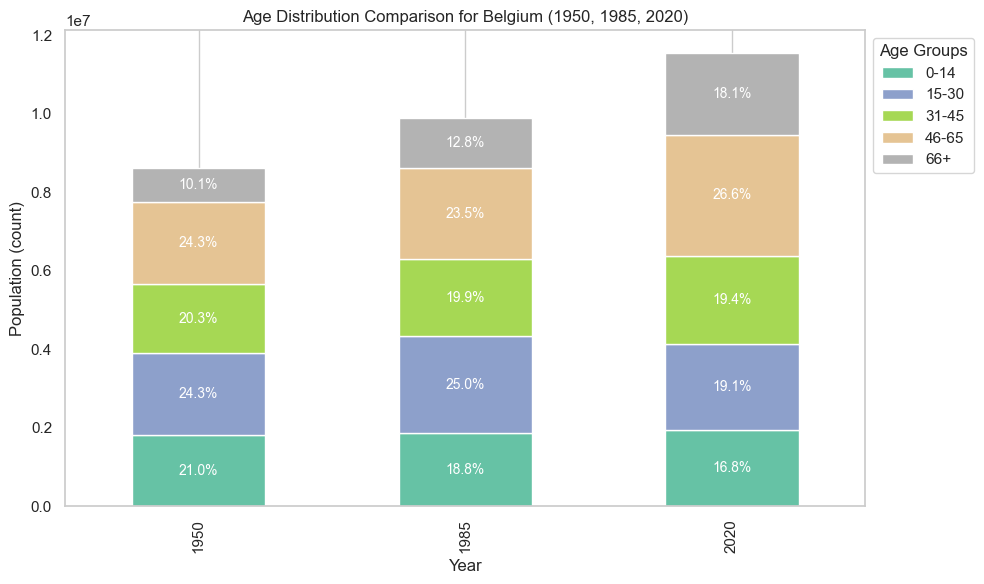

C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\4100503165.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age) # new column for age group


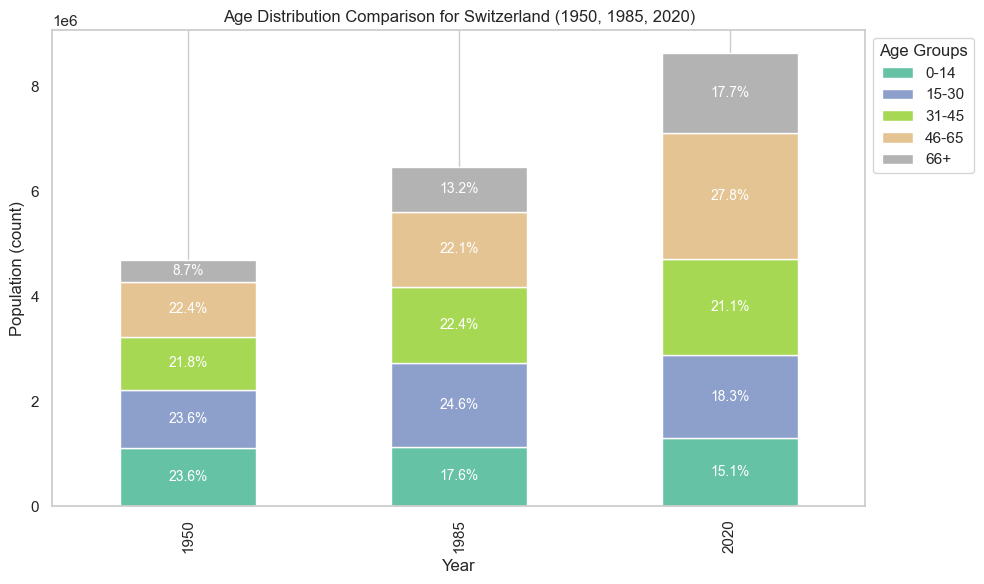

C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\4100503165.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age) # new column for age group


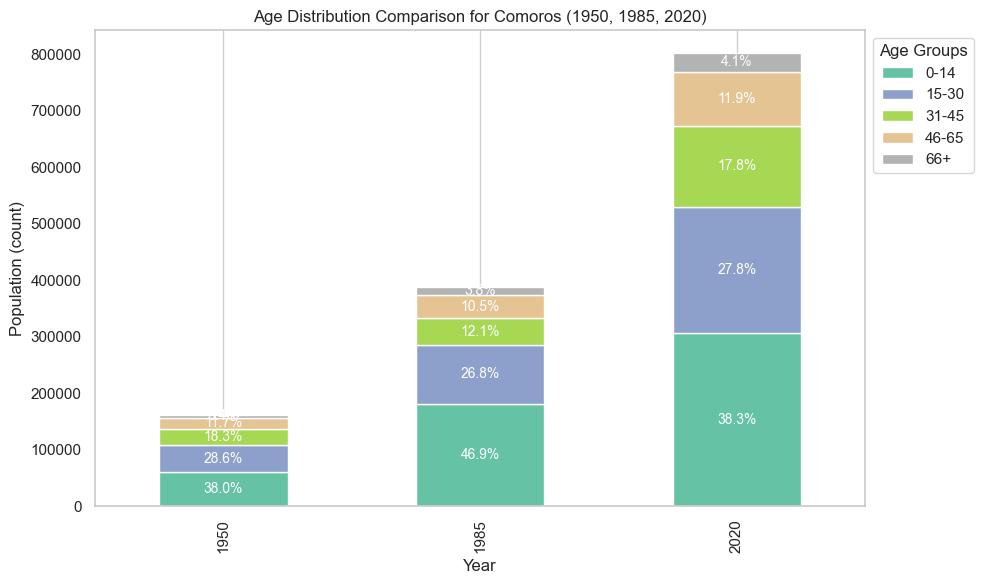

C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\4100503165.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age) # new column for age group


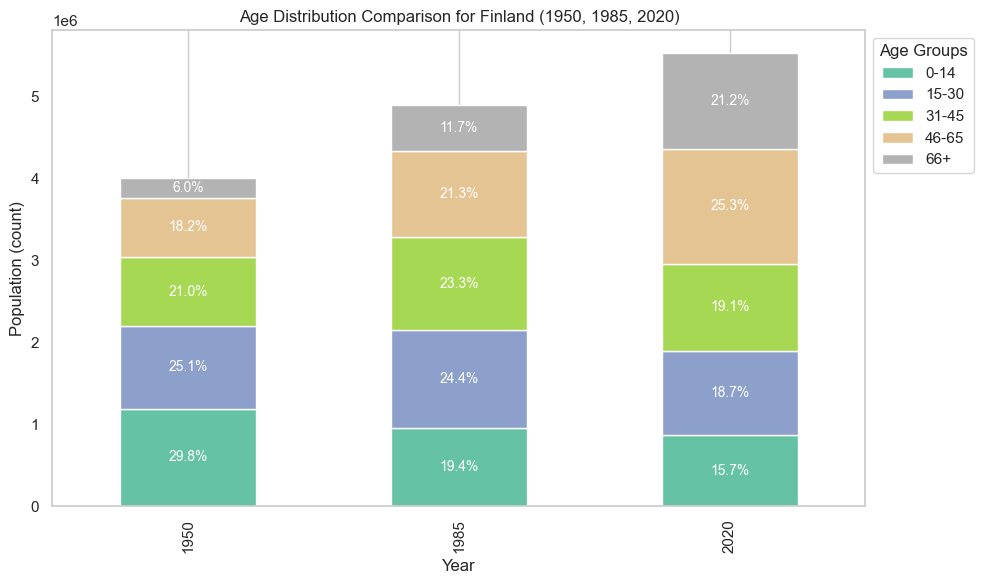

C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\4100503165.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age) # new column for age group


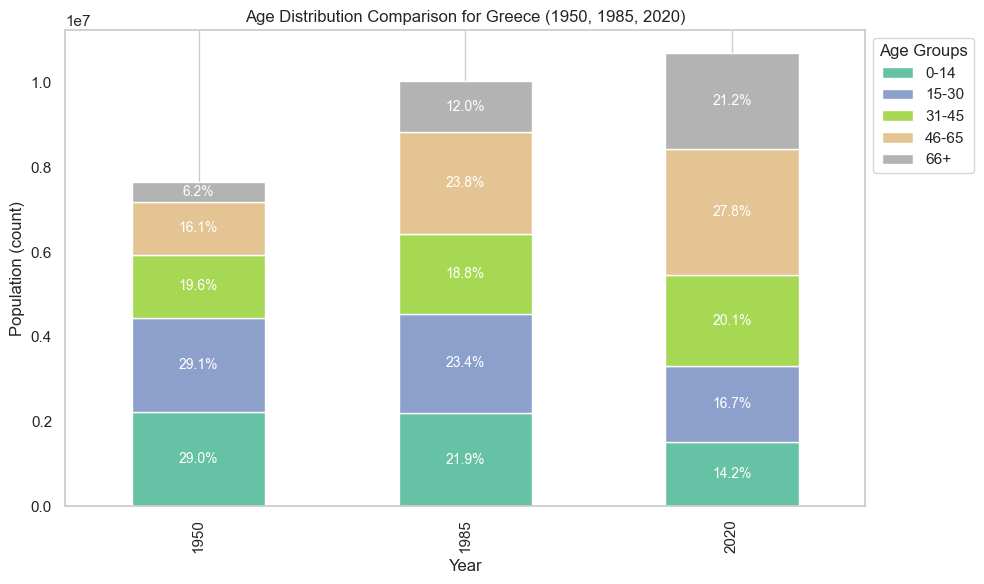

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

age_bins = [0, 14, 30, 45, 65, float('inf')]  # set bins for graph
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']  # labels for bins

# function to categorize age
def sort_age(age):
    if 0 <= age <= 14:
        return '0-14'
    elif 15 <= age <= 30:
        return '15-30'
    elif 31 <= age <= 45:
        return '31-45'
    elif 46 <= age <= 65:
        return '46-65'
    else:
        return '66+'

# years to compare
year_compare = [1950, 1985, 2020]

# for each country in the 'data' dictionary
for country, df in data.items():

    country_data = df[df['year'].isin(year_compare)] # filter data to specified years
    
    country_data['age_group'] = country_data['age'].apply(sort_age) # new column for age group
    
    # group by year and age_group, calculate the sum of the population
    age_distribution = country_data.groupby(['year', 'age_group'])['population'].sum().unstack()
    
    # calculate percentage for each age group 
    age_distribution_percent = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100  # divide part by whole, times 100
    
    # Create the stacked bar chart for the current country
    ax = age_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', 
                               title=f'Age Distribution Comparison for {country_names[country]} (1950, 1985, 2020)')

    # add percentages
    for i in range(len(age_distribution)):  # for len in age_distribution
        for j, age_group in enumerate(age_distribution.columns):  # for each column
            height = age_distribution.iloc[i, j]  # for each segment
            if height > 0:  # only segments that have actual value
                y_position = age_distribution.iloc[:i + 1, :].iloc[i].cumsum().iloc[j] - (height / 2)  # find where the label goes by 
                # taking the height of the segment and dividing by 2
                age_percent = age_distribution_percent.iloc[i, j] # import percentage from before
                ax.text(i, y_position, f'{age_percent:.1f}%', ha='center', va='center', color='white', fontsize=10)  # add percentage label

    # build plot
    plt.xlabel('Year')
    plt.ylabel('Population (count)')
    plt.legend(title='Age Groups', bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(axis='y')  # show gridlines on the y-axis
    plt.tight_layout()
    plt.show()


## Part 2: Seaborn

1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
   - Use seaborn's heatmap function
   - Add clear annotations and labels
   - Write a brief explanation of what the heatmap reveals about the population structure

C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\380943825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age)  # apply age sort
C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\380943825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age)  # apply age sort
C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\380943825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a 

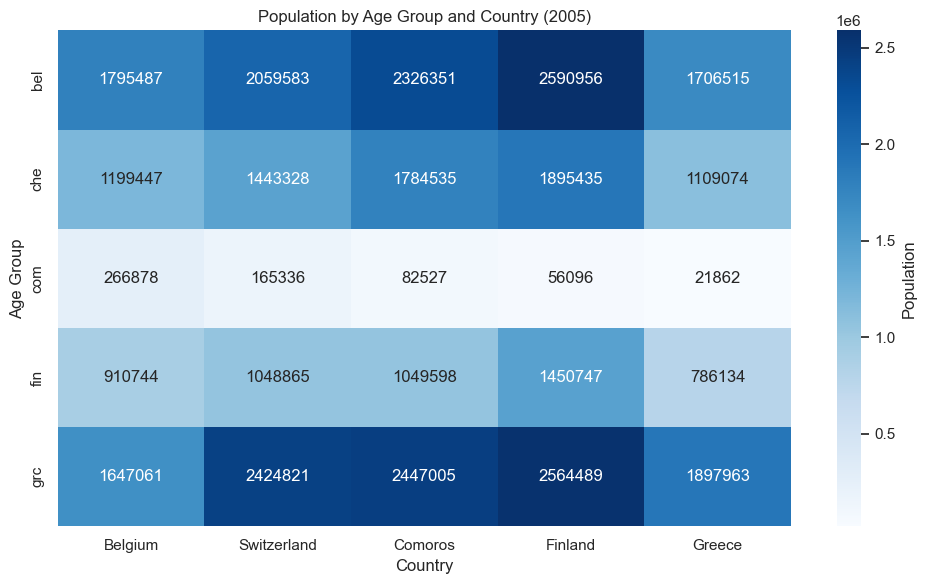

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_distribution = {}

for country, df in data.items():
    country_data = df[df['year'] == 2005]  # filter for the year 2005
    country_data['age_group'] = country_data['age'].apply(sort_age)  # apply age sort
    age_distribution[country] = country_data.groupby('age_group')['population'].sum()  # sum population by age group

age_distribution_df = pd.DataFrame(age_distribution) # data frame for processing

age_distribution_df = age_distribution_df.reindex(age_labels, axis=0) # re-order 

# plot
plt.figure(figsize=(10, 6))
sns.heatmap(age_distribution_df.T, annot=True, fmt='.0f', cmap='Blues', 
            cbar_kws={'label': 'Population'}, xticklabels=country_names.values())

plt.title('Population by Age Group and Country (2005)')
plt.xlabel('Country')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
   - Create side-by-side violin plots using seaborn
   - Add clear labels and a title
   - Write a brief comparison of what the plots reveal

C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\1330352125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age) # add by age
C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\1330352125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['age_group'] = country_data['age'].apply(sort_age) # add by age
C:\Users\jelou\AppData\Local\Temp\ipykernel_16504\1330352125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

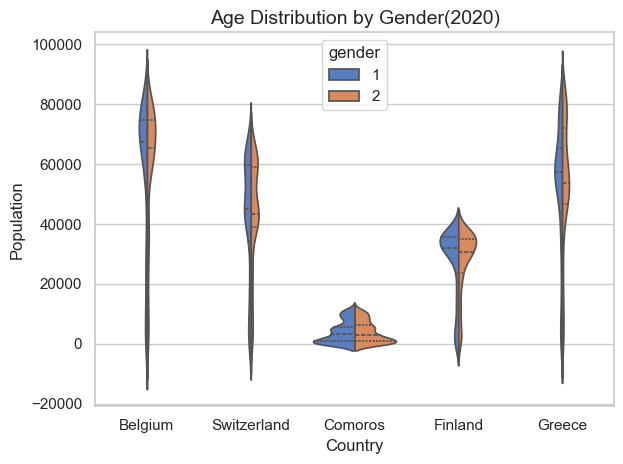

In [57]:
age_distribution = []

for country, df in data.items():
    country_data = df[df['year'] == 2020] # filter for 2020
    country_data['age_group'] = country_data['age'].apply(sort_age) # add by age
    country_data = country_data[['gender', 'age_group', 'population']] # select data
    country_data['country'] = country_names[country]  # add country column
    age_distribution.append(country_data)  # append data

combined_data = pd.concat(age_distribution) # combine data

# plot biolin
plt.figure()
sns.set(style="whitegrid")

sns.violinplot(x='country', y='population', hue='gender', data=combined_data,
               split=True, inner="quart", palette="muted", bw=0.3)

plt.title('Age Distribution by Gender(2020)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.tight_layout()
plt.show()

3. Create a pairplot comparing population metrics across four countries:
   - Select four countries of your choice
   - Include all variables in the dataset
   - Use the country as the hue parameter to distinguish between countries
   - Write a brief summary of any patterns or relationships revealed by the pairplot

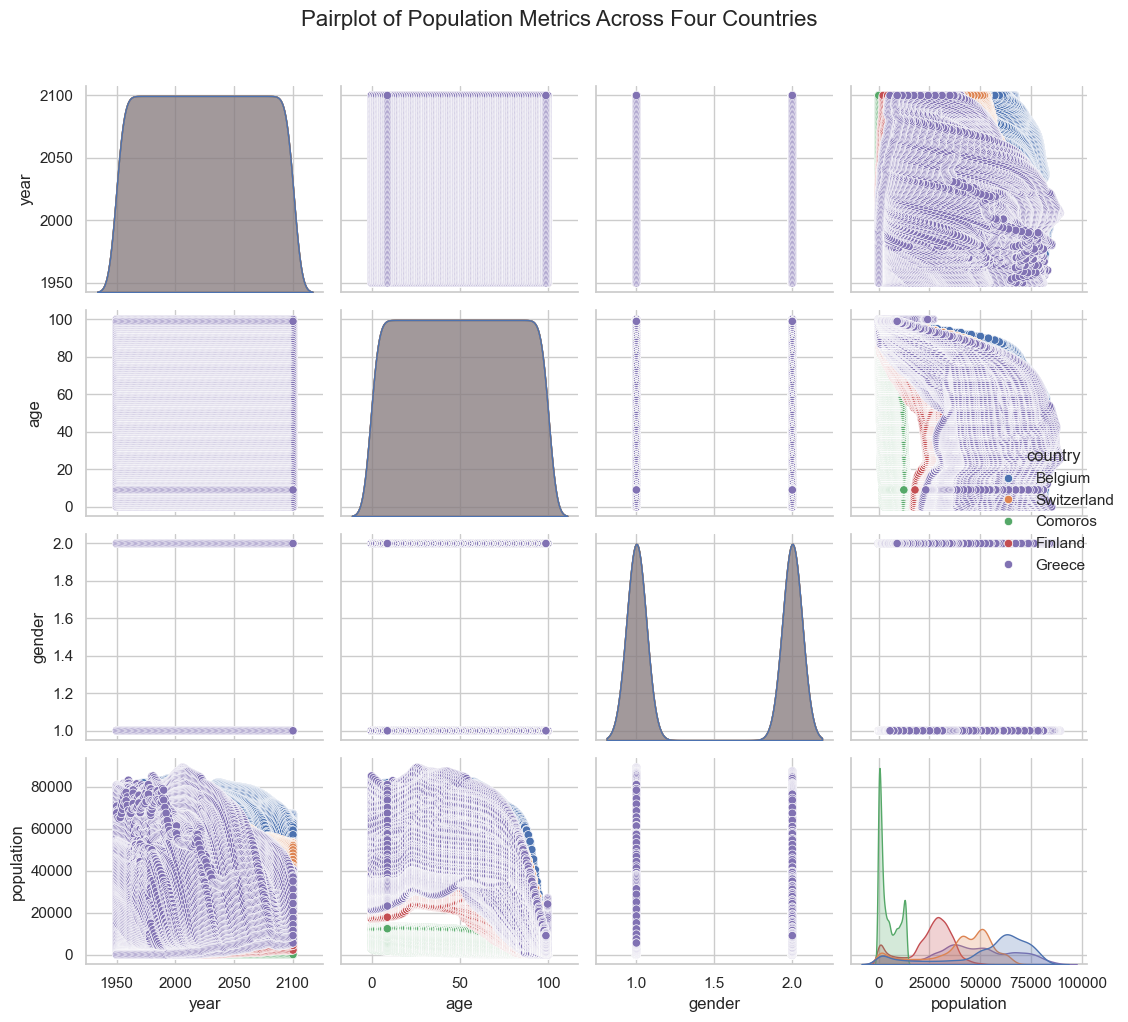

In [59]:
countries_2 = countries.pop(2) # drop one list
population_data = []

for country, df in data.items():
    country_data = df[['year', 'age', 'gender', 'population']]  
    country_data['country'] = country_names[country]  
    population_data.append(country_data)

combined_data = pd.concat(population_data)

# pairplots
sns.pairplot(combined_data, hue='country')
plt.suptitle('Pairplot of Population Metrics Across Four Countries', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()